# BUDT 758J - Final Project
## GROUP 3

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_url = 'https://raw.githubusercontent.com/ChienJuiiiii/Python-Project-Data/main/house_price_train.csv'
test_url = 'https://raw.githubusercontent.com/ChienJuiiiii/Python-Project-Data/main/house_price_test.csv'
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)
print(train.shape)

(1460, 81)


# Exploratory Data Analysis

### Check the target variable distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-42-7ae33adc4fe4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'],fit= norm)



 mu = 180921.20 
 sigma = 79415.29 



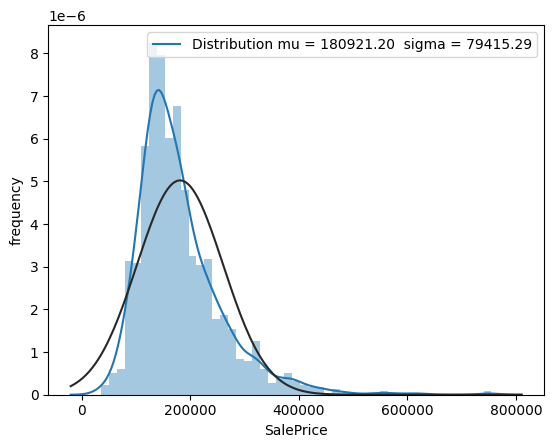

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

print(train['SalePrice'].describe()) # check the the distribution of the target
sns.distplot(train['SalePrice'],fit= norm)
(mu,sigma) = norm.fit(train['SalePrice']) # store the mean and sigma of sale price as tuple
print('\n mu = {:.2f} \n sigma = {:.2f} \n'.format(mu,sigma))
plt.legend(['Distribution mu = {:.2f}  sigma = {:.2f}'.format(mu,sigma)],
           loc = 'best') # plot the distribution of sale price
plt.ylabel('frequency')
plt.xlabel('SalePrice')
plt.show()

# Conclusion: there are outliers making the distribution skwe to the right
# Potential solution: take log of sale price

### Heatmap to check correlation between each pair of numeric features

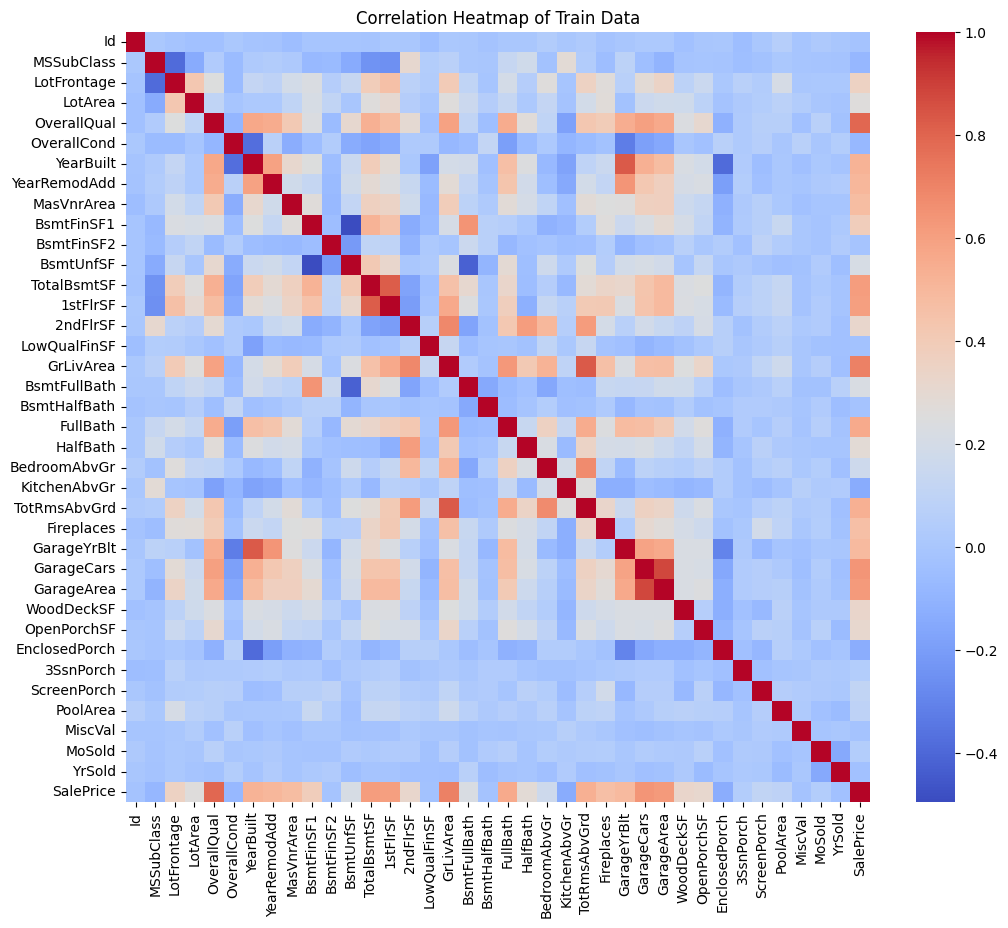

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = train.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Train Data')
plt.show()

### Check the top 10 highest correlation pairs

Top 10 feature pairs with highest correlation:
GarageCars    GarageArea      0.882475
YearBuilt     GarageYrBlt     0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
YearRemodAdd  GarageYrBlt     0.642277
dtype: float64


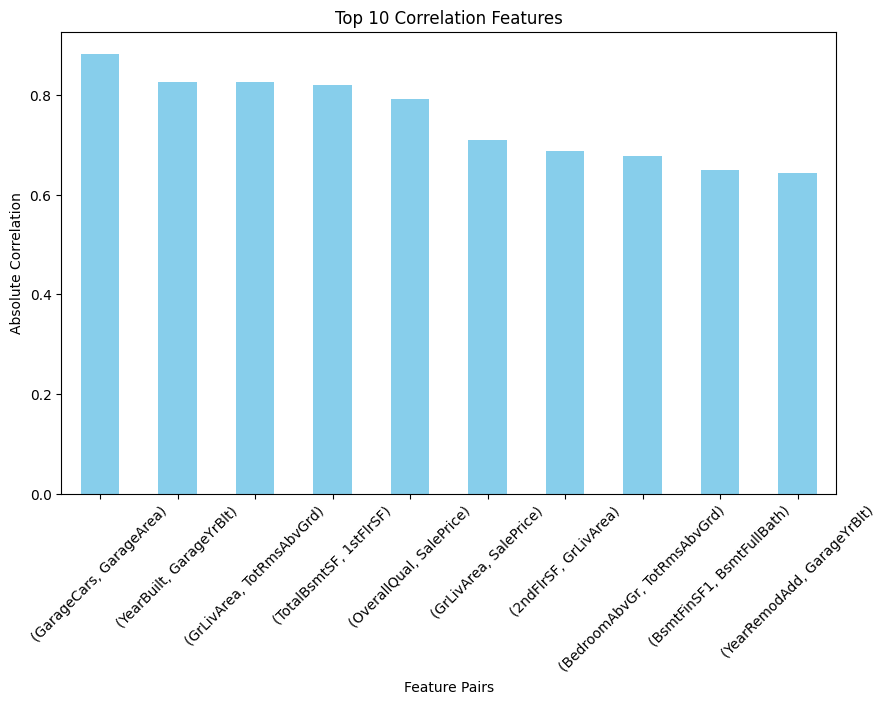

In [ ]:
# Select only numerical columns
numeric_columns = train.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Get the absolute correlation values for all features with others
correlation_with_others = correlation_matrix.abs().unstack()

# Drop self-correlation (which is 1) and sort by correlation value
sorted_correlation = correlation_with_others.drop_duplicates().sort_values(ascending=False)

# Select the top 10 features with the highest correlation
top_10_features = sorted_correlation[sorted_correlation != 1].head(10)

print("Top 10 feature pairs with highest correlation:")
print(top_10_features)

# Extract feature names from index
top_10_feature_names = [(pair[0], pair[1]) for pair in top_10_features.index]

# Plot the bar chart for these top 10 features
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='bar', color='skyblue')
plt.title('Top 10 Correlation Features')
plt.xlabel('Feature Pairs')
plt.ylabel('Absolute Correlation')
plt.xticks(rotation=45)
plt.show()

### Check categorical feature distribution for latter data cleaning

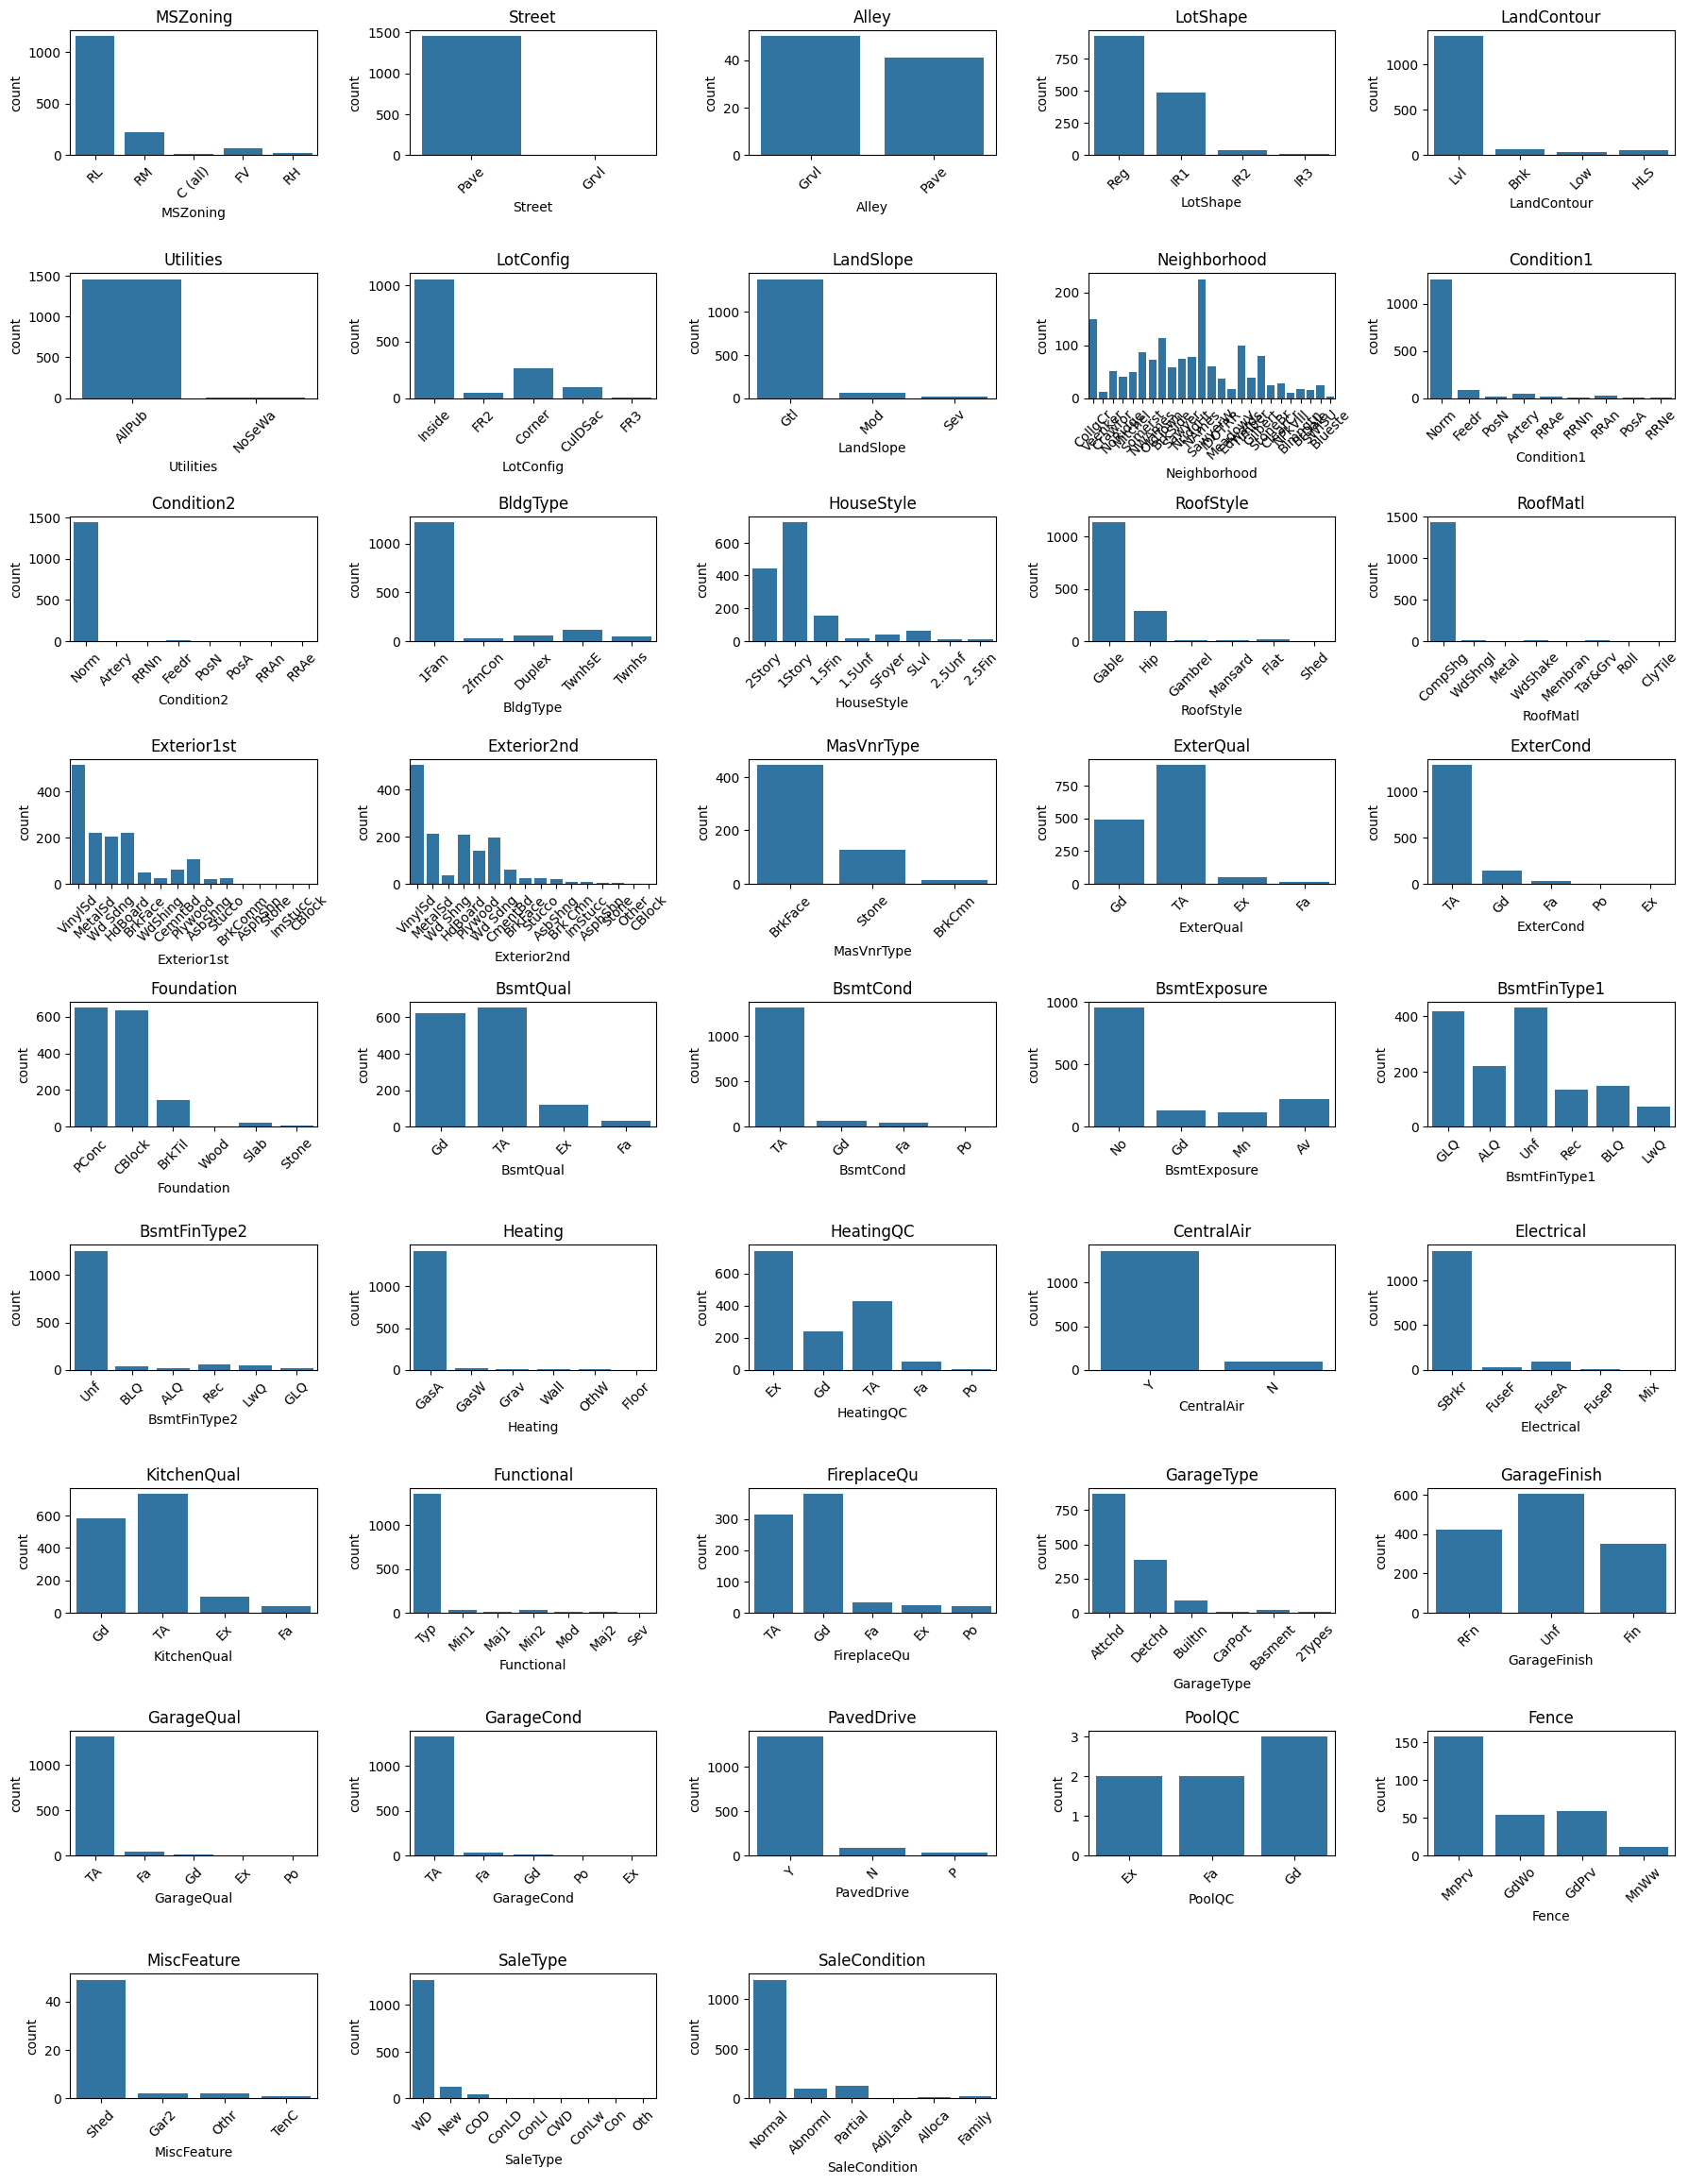

In [ ]:
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
                        'SaleType', 'SaleCondition']


plt.figure(figsize=(18, 25))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(10, 5, i)
    sns.countplot(x=feature, data=train)
    plt.title(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

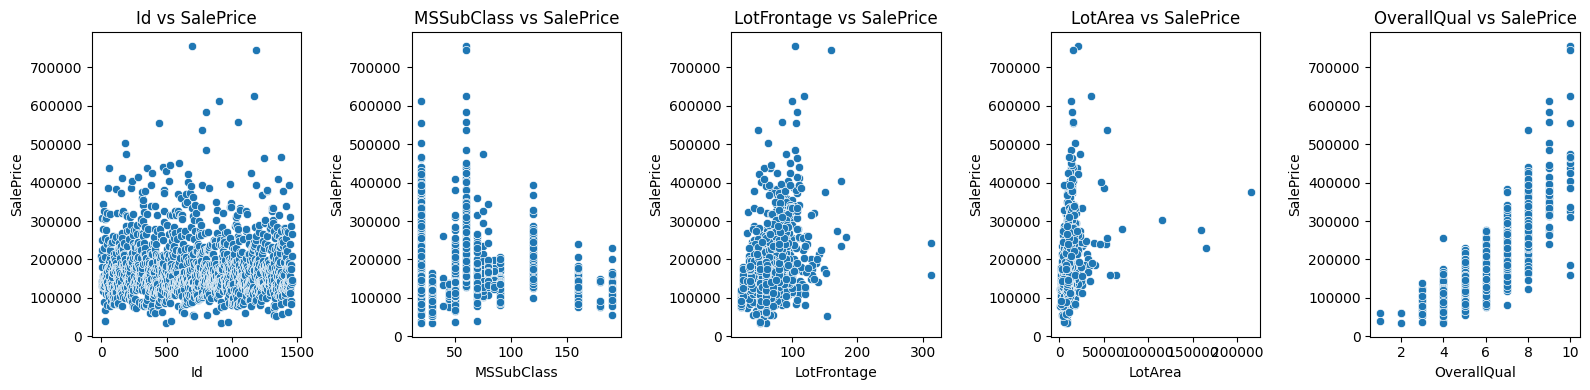

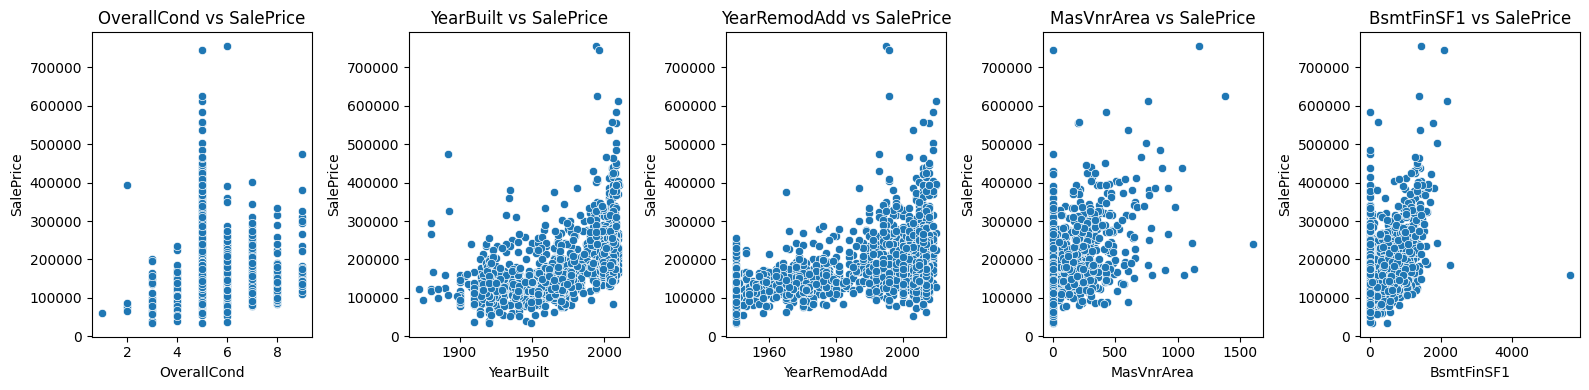

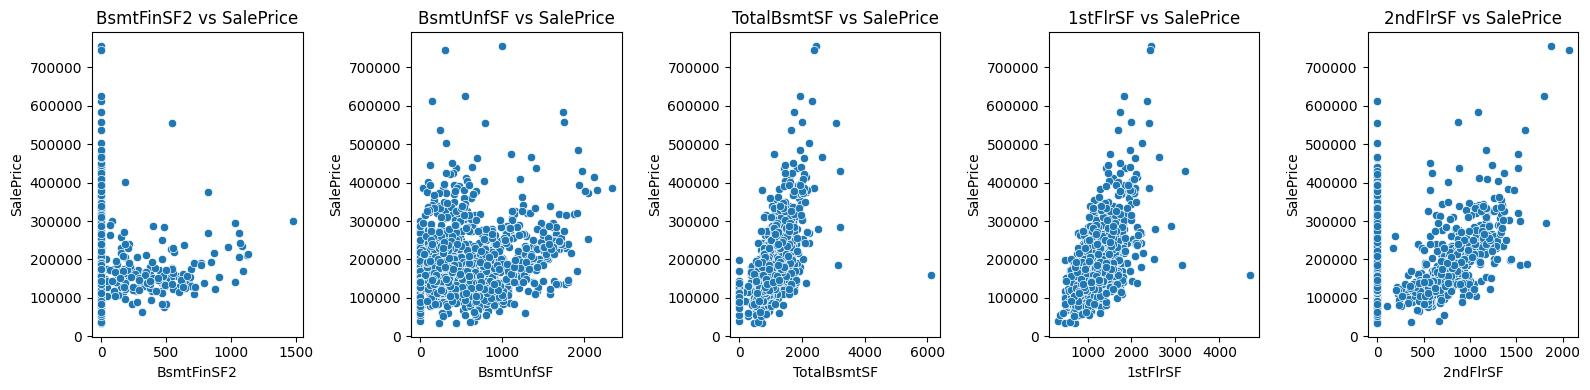

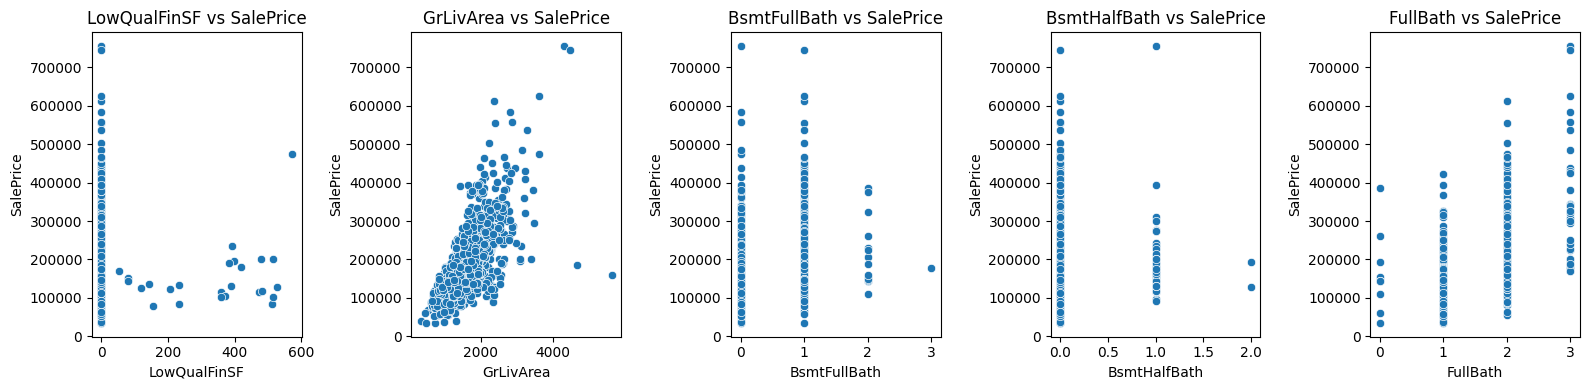

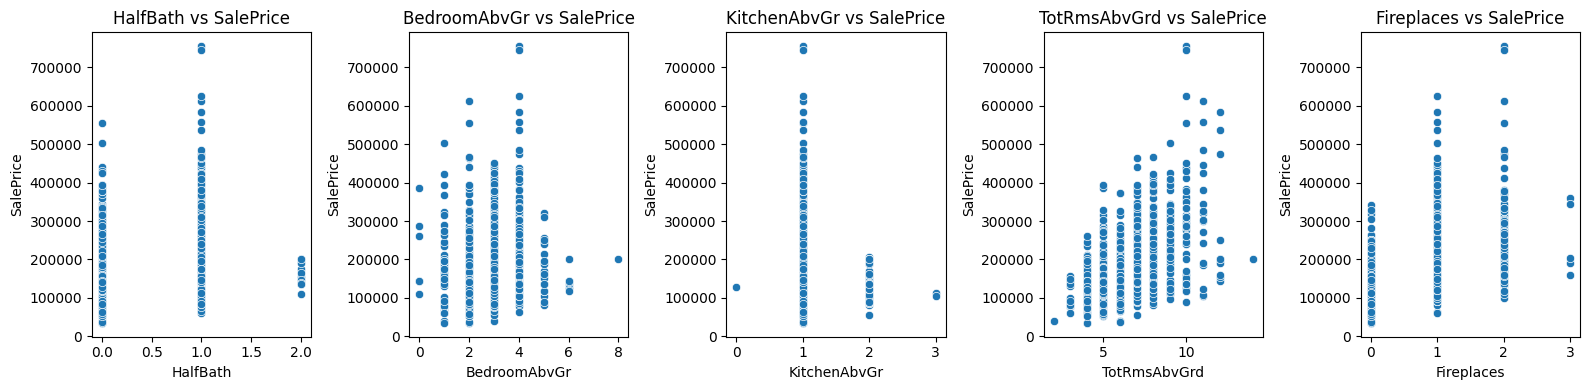

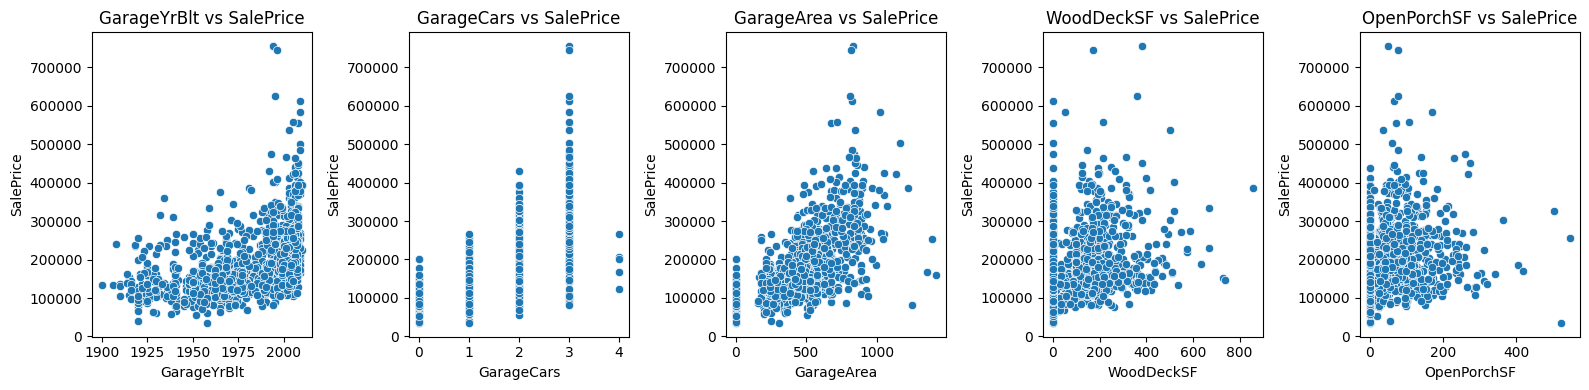

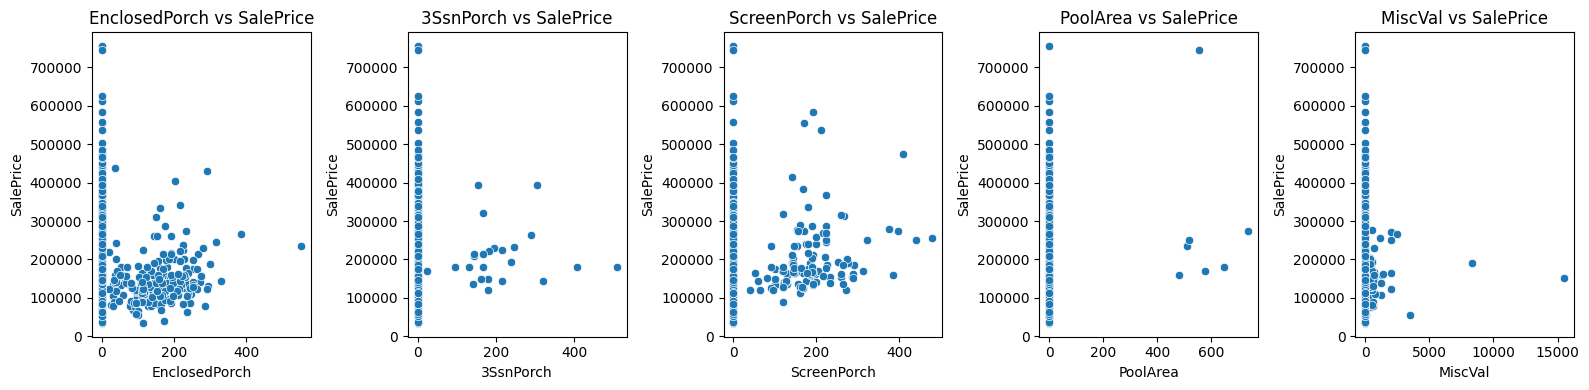

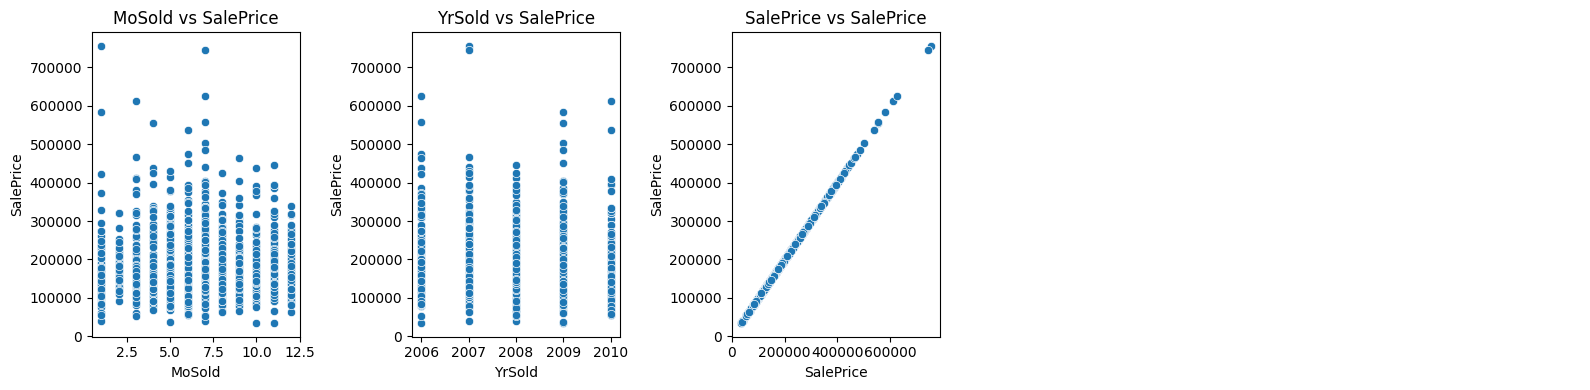

In [ ]:
# explore the correlation by all paris of numeric features and target
import math

numeric_columns = train.select_dtypes(include=['number']).columns
num_cols = len(numeric_columns)
num_plots_per_row = 5
num_rows = math.ceil(num_cols / num_plots_per_row)

for i in range(num_rows):
    fig, axes = plt.subplots(1, num_plots_per_row, figsize=(16, 4))
    for j in range(num_plots_per_row):
        idx = i * num_plots_per_row + j
        if idx < num_cols:
            sns.scatterplot(x=train[numeric_columns[idx]], y=train['SalePrice'], ax=axes[j])
            axes[j].set_title(f'{numeric_columns[idx]} vs SalePrice')
            axes[j].set_xlabel(numeric_columns[idx])
            axes[j].set_ylabel('SalePrice')
        else:
            axes[j].axis('off')  # turn off empty subplot
    plt.tight_layout()
    plt.show()

# Conclusion
# Not useful numeric feature:
# 1. drop: Id
# 2. log transformation: LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2
# Pending decide how to transform: 2edFlrSF, LowQualFinSF

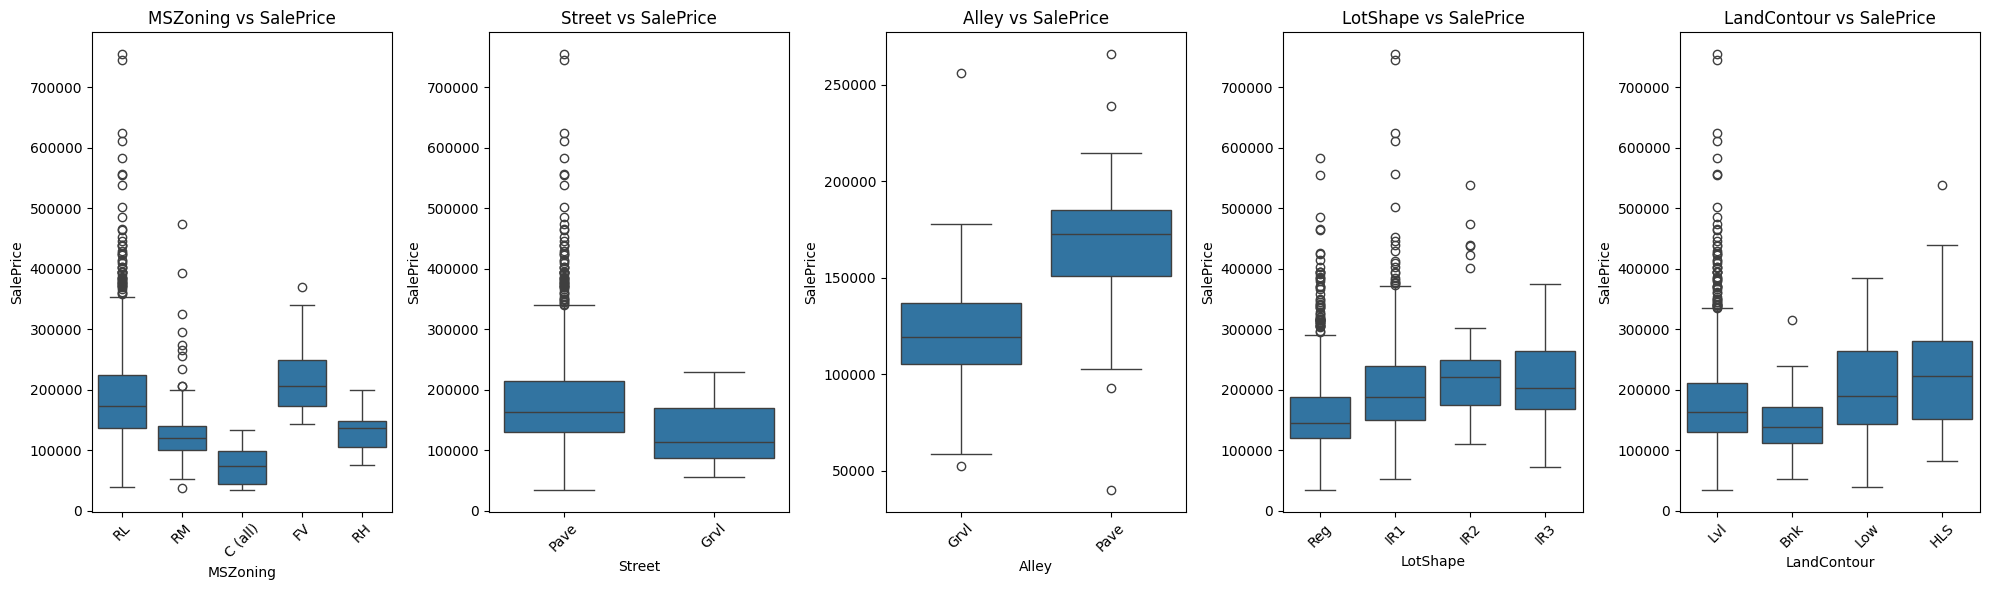

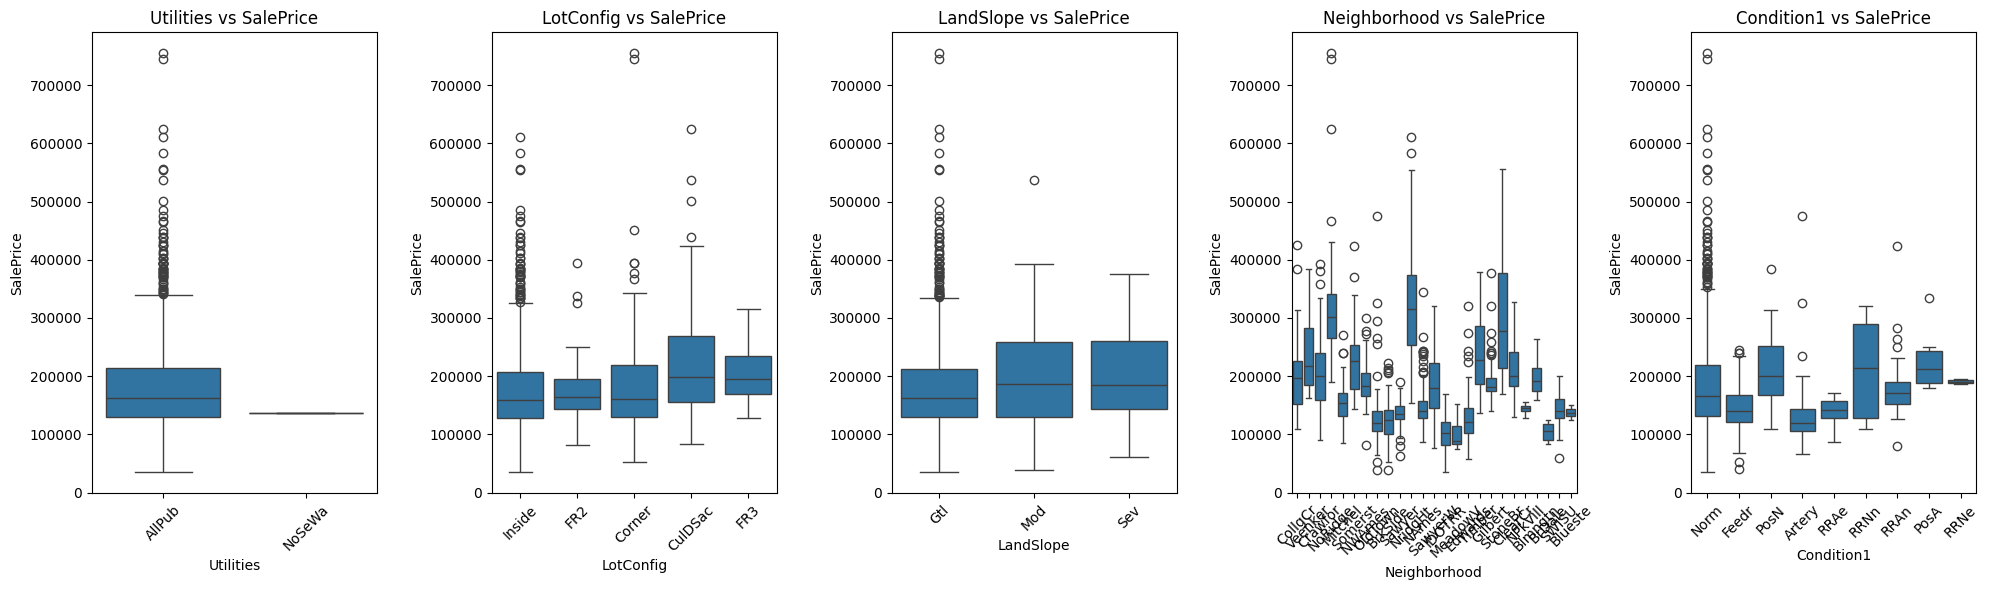

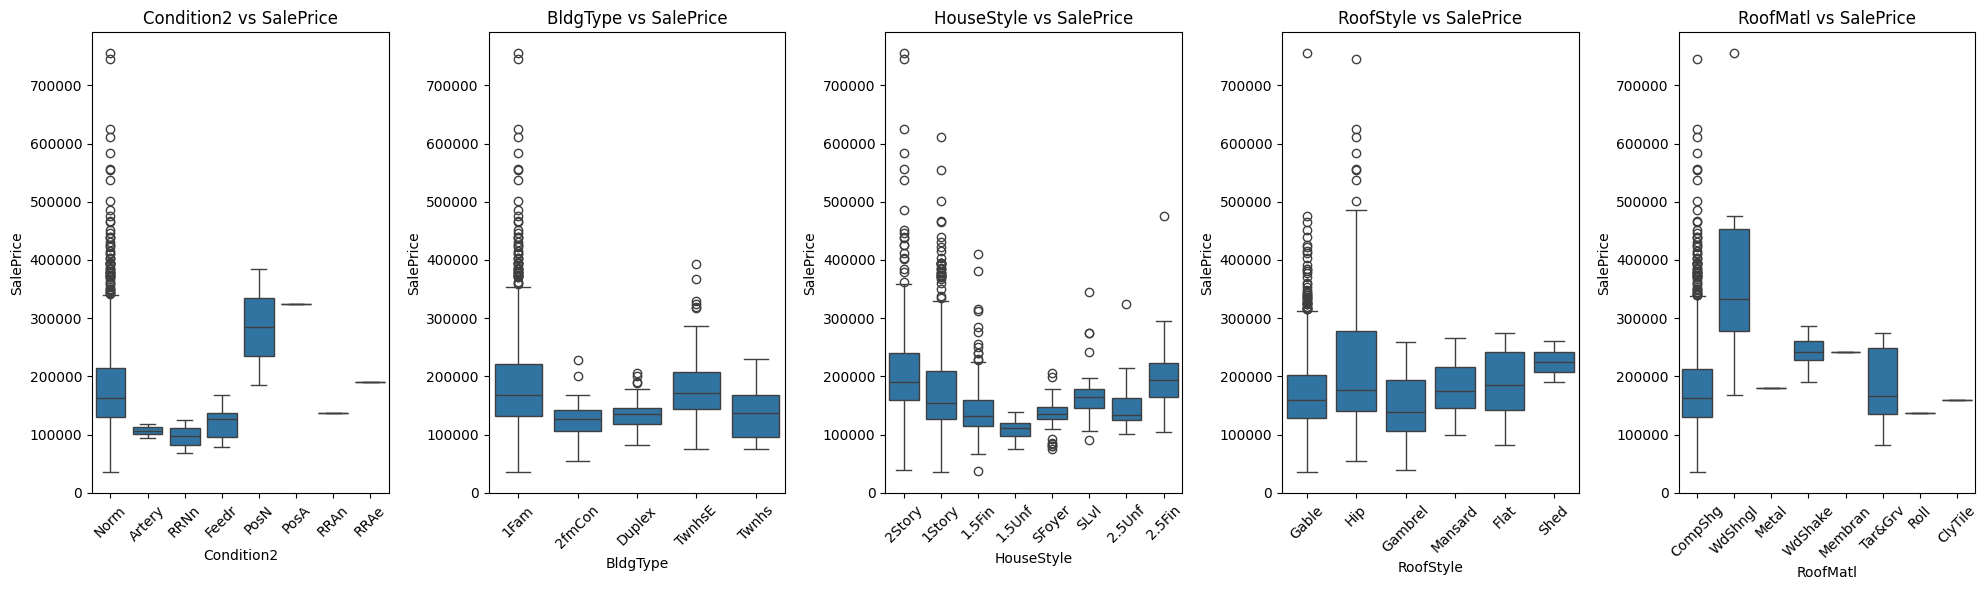

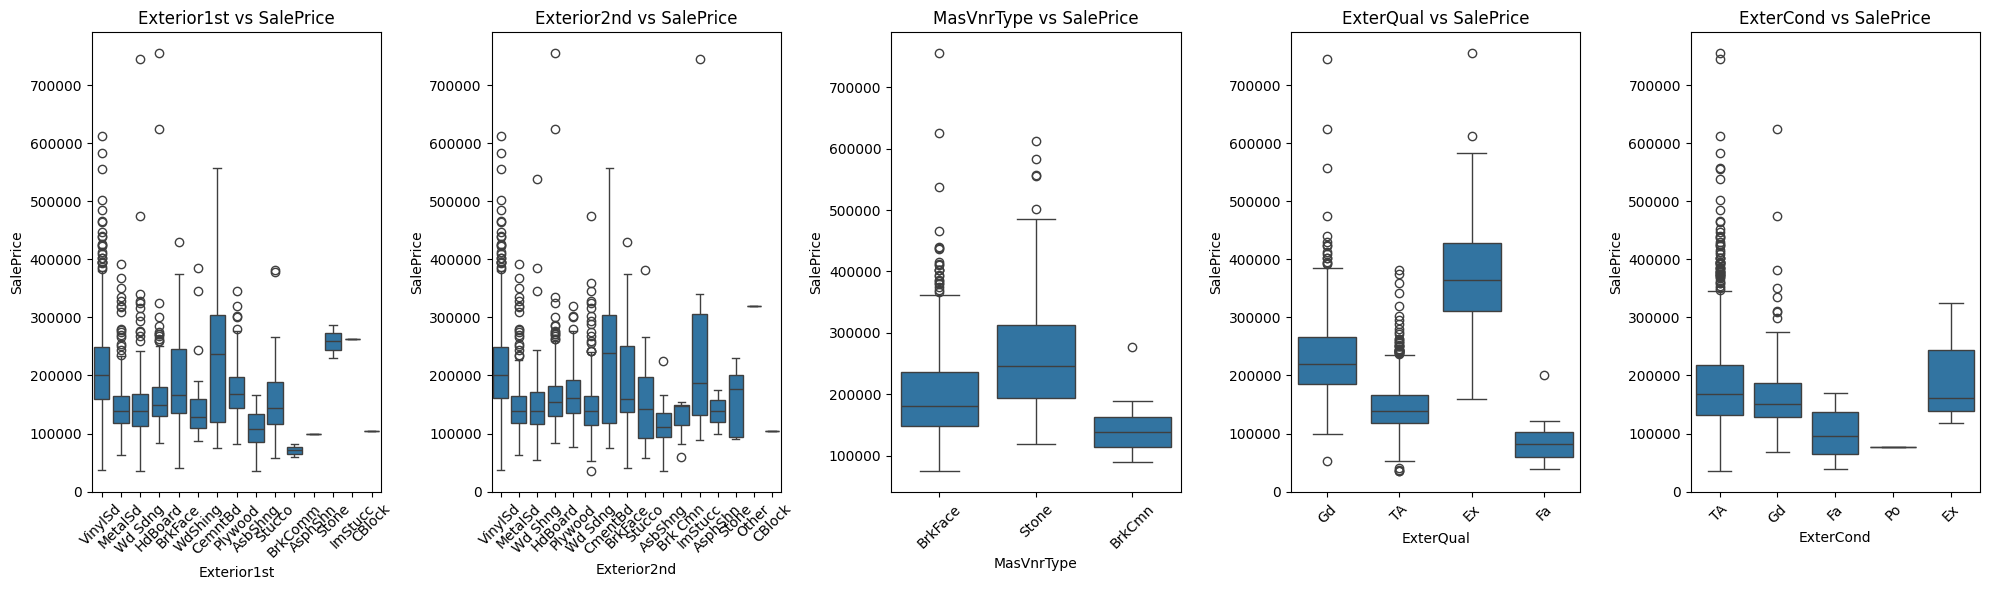

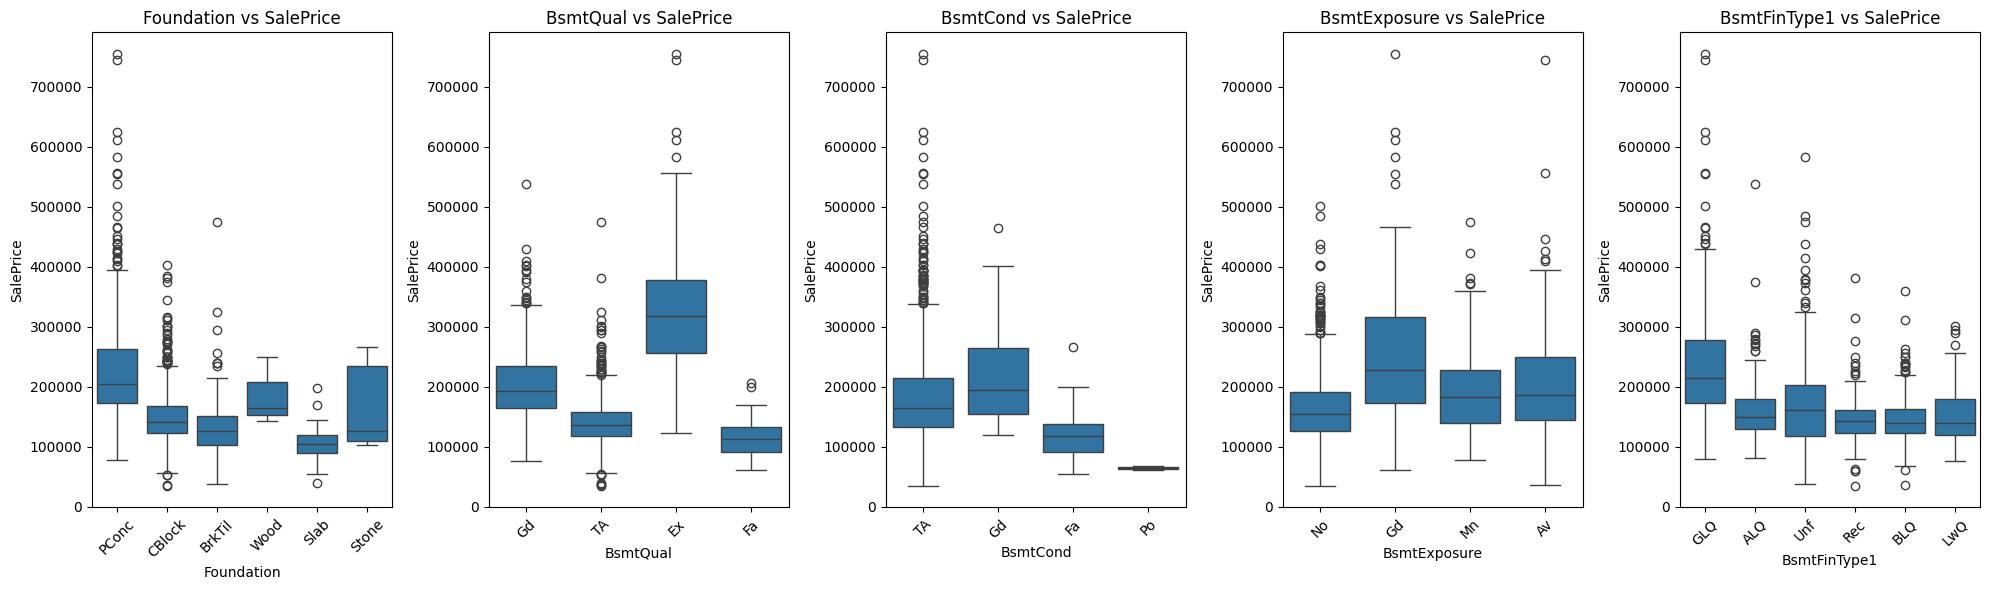

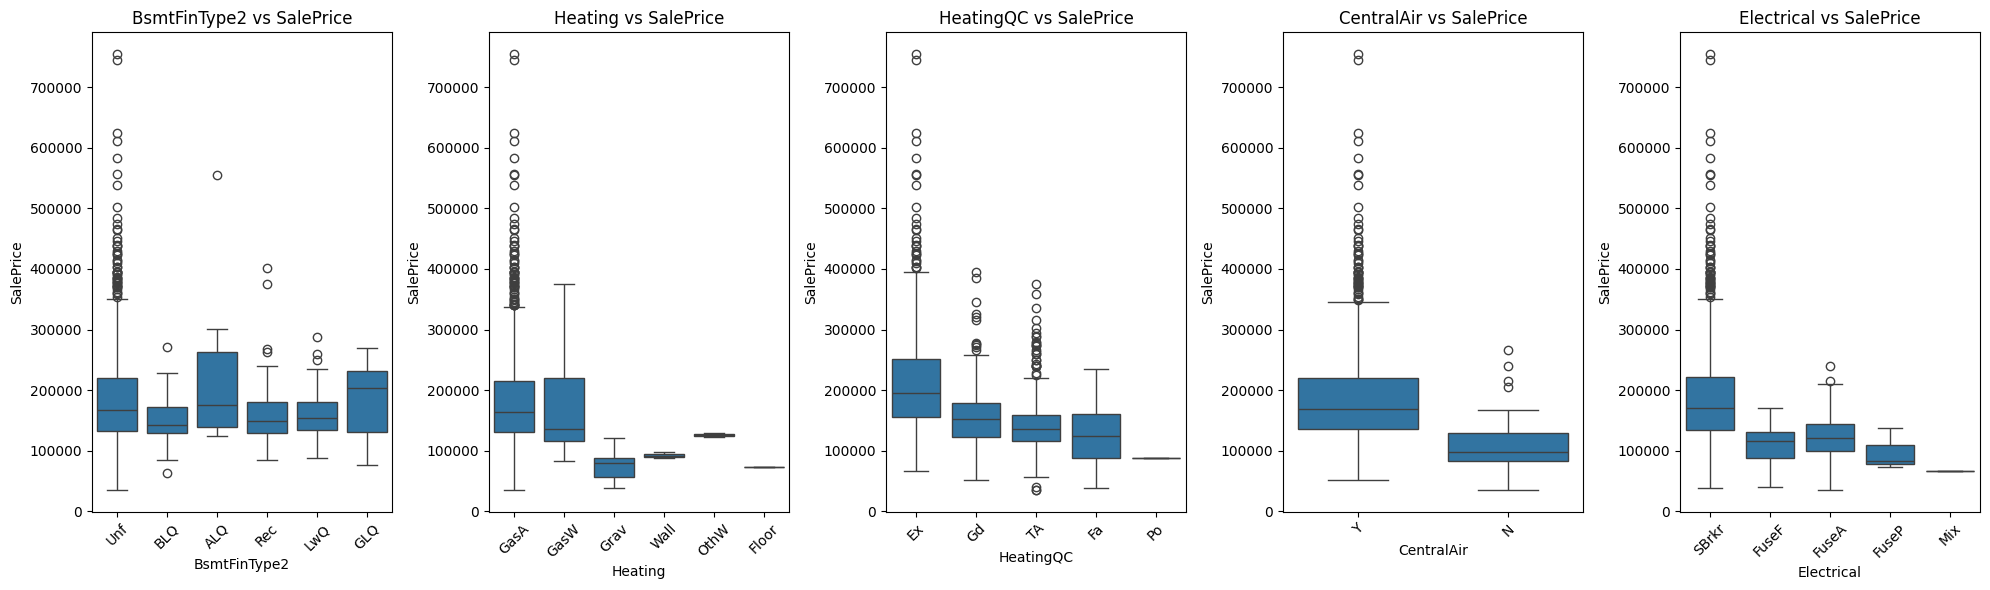

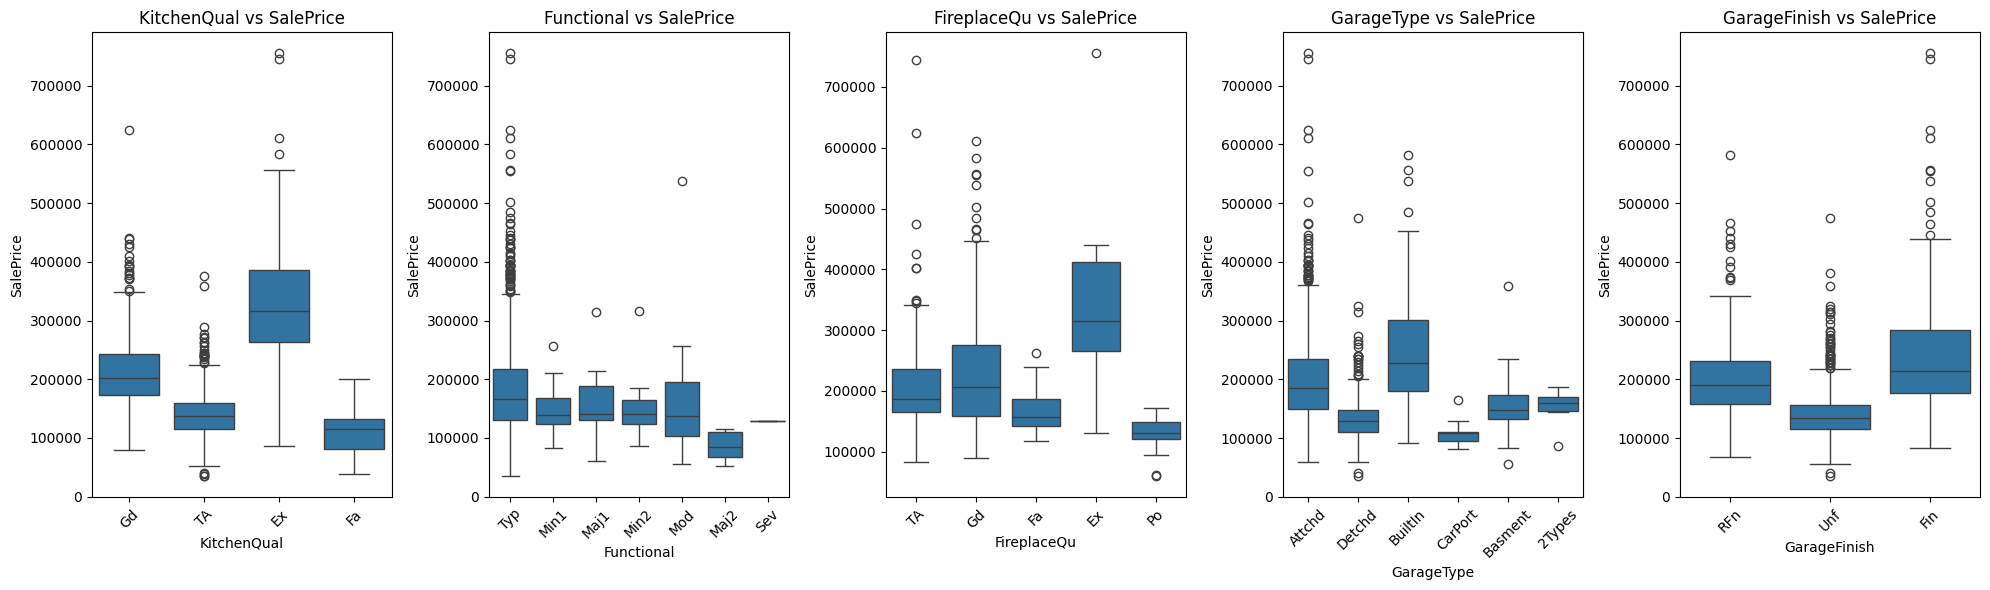

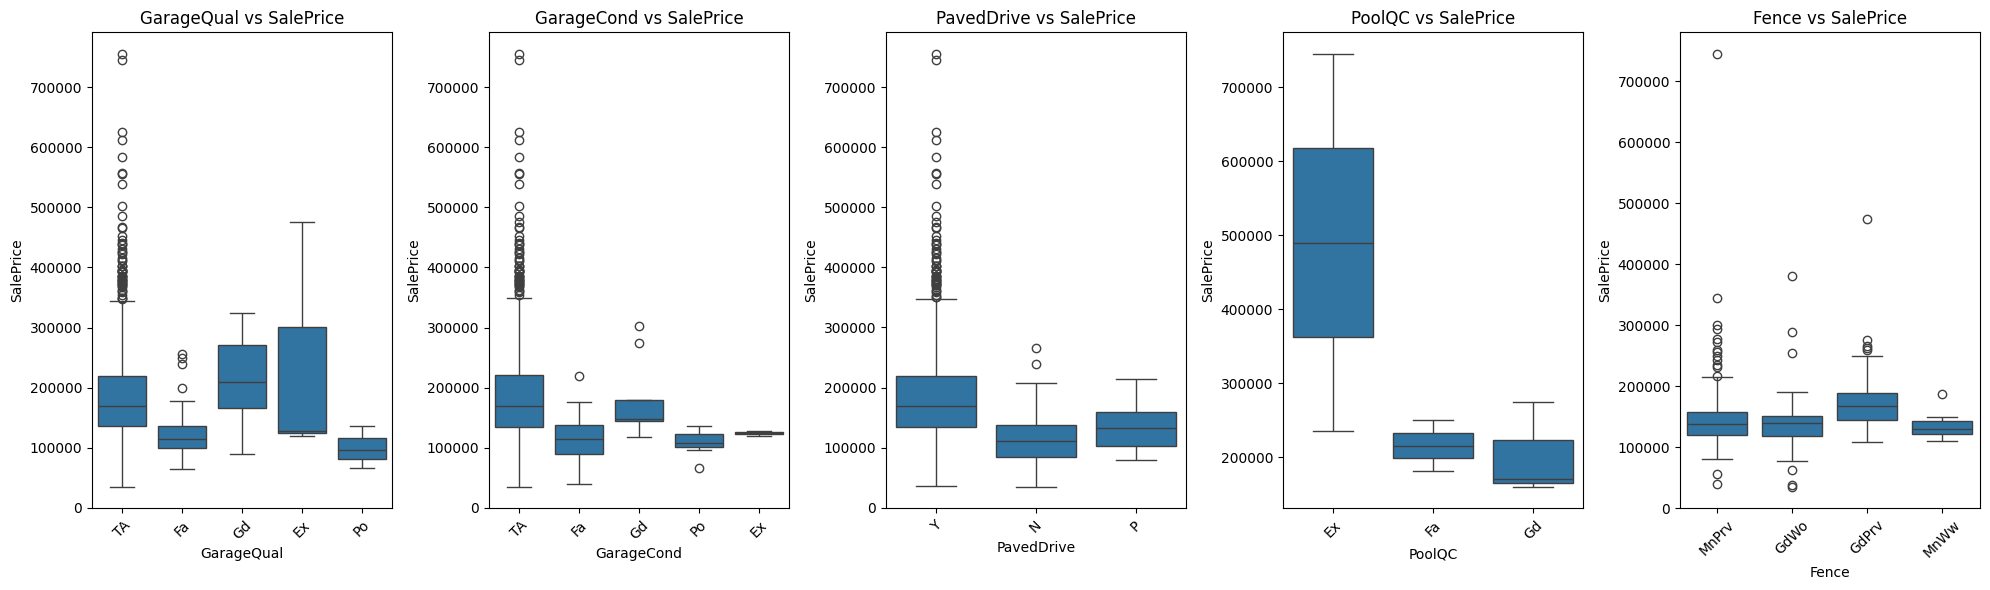

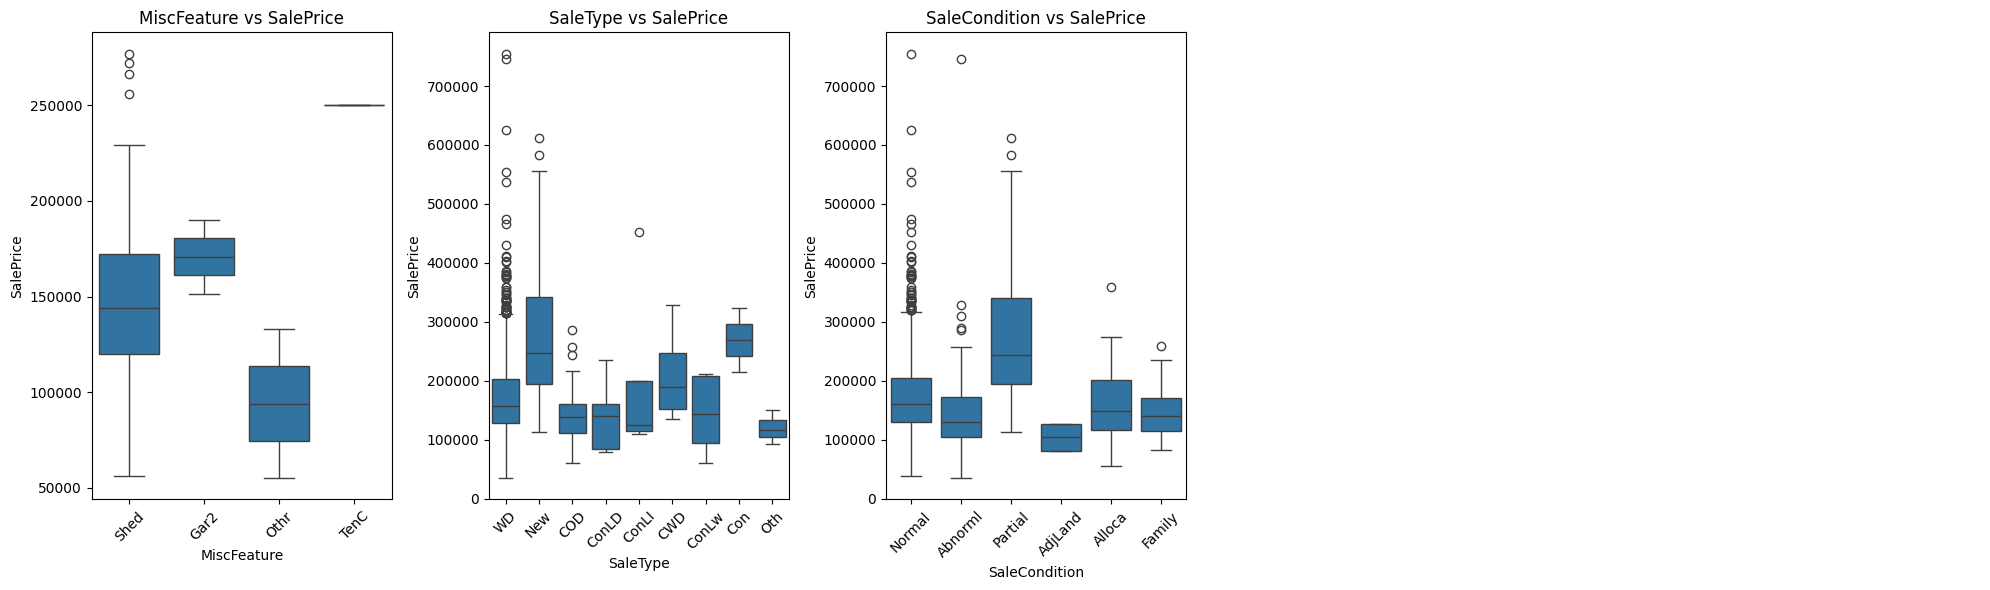

In [ ]:
categorical_columns = train.select_dtypes(include=['object']).columns
num_cols = len(categorical_columns)
num_plots_per_row = 5
num_rows = math.ceil(num_cols / num_plots_per_row)

for i in range(num_rows):
    fig, axes = plt.subplots(1, num_plots_per_row, figsize=(20, 6))
    for j in range(num_plots_per_row):
        idx = i * num_plots_per_row + j
        if idx < num_cols:
            sns.boxplot(x=categorical_columns[idx], y='SalePrice', data=train, ax=axes[j])
            axes[j].set_title(f'{categorical_columns[idx]} vs SalePrice')
            axes[j].set_xlabel(categorical_columns[idx])
            axes[j].set_ylabel('SalePrice')
            axes[j].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
        else:
            axes[j].axis('off')  # turn off empty subplot
    plt.tight_layout()
    plt.show()

# Data Cleaning

### Combine train and test for comprehensive data cleaning

In [ ]:
# append train and test for comprehensive data cleaning
train_x = train.drop('SalePrice', axis = 1) # separate train features and target
train_y = train['SalePrice'] # separate train features and target
train_x['dataset'] = 'train'
test['dataset'] = 'test'
print(f'train x data (row, column): {train_x.shape}')
print(f'test x data (row, column): {test.shape}')
combined_train_test_x_data = pd.concat([train_x, test], axis=0)
print(f'combined x data (row, column): {combined_train_test_x_data.shape}')
combined_train_test_x_data.info()
# after data cleaning, the combined_train_test_x_data will be separated by dataset column

train x data (row, column): (1460, 81)
test x data (row, column): (1459, 81)
combined x data (row, column): (2919, 81)
<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-nu

### Clean 1-16 features
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling

<ipython-input-49-5f115703286a>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined_train_test_x_data['LotArea'], fit=norm) # Fit a normal distribution to the LotArea data


HouseStyle
1Story    0.503940
2Story    0.298732
1.5Fin    0.107571
Other     0.089757
Name: proportion, dtype: float64

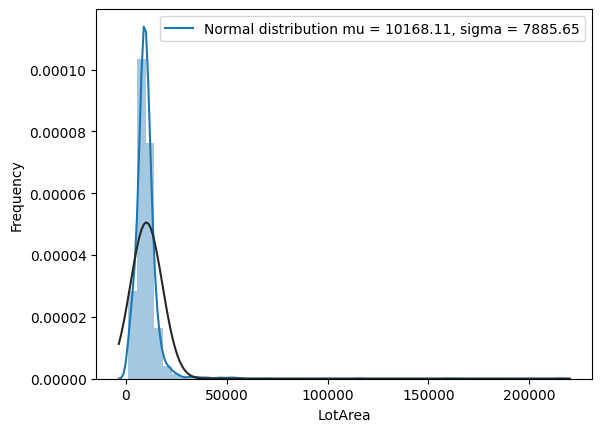

In [ ]:
# check if NA
# numeric: check outliers
# categorical: check frequency, regroup if need

# MSSubClass
combined_train_test_x_data['MSSubClass'].isna().sum() # no missing value
combined_train_test_x_data['MSSubClass'].value_counts(normalize=True).sort_index() # regroup 20~45 as 1, 60~90 as 2, 90~190 as group 3
combined_train_test_x_data['MSSubClass'] = combined_train_test_x_data['MSSubClass'].apply(lambda x: 1 if x <= 45 else (2 if x <= 90 else 3))
# MSZoning
combined_train_test_x_data['MSZoning'].isna().sum() # 4 missing value
combined_train_test_x_data['MSZoning'].value_counts(normalize=True).sort_index()
most_frequent_zone = combined_train_test_x_data['MSZoning'].mode()[0] # retrive the zone mode
combined_train_test_x_data['MSZoning'].fillna(most_frequent_zone, inplace=True) # replace NA with the mode
# LotFrontage
combined_train_test_x_data['LotFrontage'].isna().sum() # 486 missing value
combined_train_test_x_data['LotFrontage'].value_counts(normalize=True).sort_index()
combined_train_test_x_data['LotFrontage'].fillna(0, inplace=True) # replace NA with 0
# LotArea
combined_train_test_x_data['LotArea'].isna().sum() # no missing value
combined_train_test_x_data['LotArea'].describe() # there are outliers
sns.distplot(combined_train_test_x_data['LotArea'], fit=norm) # Fit a normal distribution to the LotArea data
(mu, sigma) = norm.fit(combined_train_test_x_data['LotArea'])
plt.legend(['Normal distribution mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.xlabel('LotArea')
combined_train_test_x_data['LotArea'] = np.log(combined_train_test_x_data['LotArea']) # take log because there the value range is too large
combined_train_test_x_data['LotArea'].describe()
# Street: drop it, this feature is useless, 99% Prave, 0.4% Grvl
combined_train_test_x_data['Street'].isna().sum() # no missing value
combined_train_test_x_data['Street'].value_counts(normalize=True)
combined_train_test_x_data.drop(columns=['Street'], inplace=True)
# Alley: drop it, this feature is useless, too many NA
combined_train_test_x_data['Alley'].isna().sum() # 2721 missing value
combined_train_test_x_data.drop(columns=['Alley'], inplace=True)
# LotShape
combined_train_test_x_data['LotShape'].isna().sum() # no missing value
combined_train_test_x_data['LotShape'].value_counts(normalize=True)
# LandContour
combined_train_test_x_data['LandContour'].isna().sum() # no missing value
combined_train_test_x_data['LandContour'].value_counts(normalize=True)
combined_train_test_x_data['LandContour'] = combined_train_test_x_data['LandContour'].replace(['Bnk', 'HLS', 'Low'], 'Other') # regrop into Lvl and Other
# Utilities: drop it, this feature is useless, 99% AllPub, 0.3% NoSeWa
combined_train_test_x_data['Utilities'].isna().sum() # 2 missing value
most_frequent_utilities = combined_train_test_x_data['Utilities'].mode()[0]
combined_train_test_x_data['Utilities'].fillna(most_frequent_utilities, inplace=True) # replace NA with the mode
combined_train_test_x_data['Utilities'].value_counts(normalize=True)
combined_train_test_x_data.drop(columns=['Utilities'], inplace=True)
# LotConfig
combined_train_test_x_data['LotConfig'].isna().sum() # no missing value
combined_train_test_x_data['LotConfig'].value_counts(normalize=True)
combined_train_test_x_data['LotConfig'] = combined_train_test_x_data['LotConfig'].replace(['CulDSac', 'FR2', 'FR3'], 'Other') # regroup into only three categories
# LandSlope
combined_train_test_x_data['LandSlope'].isna().sum() # no missing value
combined_train_test_x_data['LandSlope'].value_counts(normalize=True)
combined_train_test_x_data['LandSlope'] = combined_train_test_x_data['LandSlope'].replace(['Mod', 'Sev'], 'Other') # regroup into only two categories
# Neighborhood
combined_train_test_x_data['Neighborhood'].isna().sum() # no missing value
combined_train_test_x_data['Neighborhood'].value_counts(normalize=True)
# Condition1
combined_train_test_x_data['Condition1'].isna().sum() # no missing value
combined_train_test_x_data['Condition1'].value_counts(normalize=True)
# Condition2 drop it, this feature is useless, 99% Norm, the rest 1%
combined_train_test_x_data['Condition2'].isna().sum() # no missing value
combined_train_test_x_data['Condition2'].value_counts(normalize=True)
combined_train_test_x_data.drop(columns=['Condition2'], inplace=True)
# BldgType
combined_train_test_x_data['BldgType'].isna().sum() # no missing value
combined_train_test_x_data['BldgType'].value_counts(normalize=True)
# HouseStyle
combined_train_test_x_data['HouseStyle'].isna().sum() # no missing value
combined_train_test_x_data['HouseStyle'].value_counts(normalize=True)
combined_train_test_x_data['HouseStyle'] = combined_train_test_x_data['HouseStyle'].replace(['2.5Unf', '1.5Unf', '2.5Fin', 'SLvl', 'SFoyer'], 'Other') # regroup into only 4 categories
combined_train_test_x_data['HouseStyle'].value_counts(normalize=True)

### Clean 17-32 features


*   OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls



In [ ]:
# OverallQual, OverallCond, YearBuilt, YearRemodAdd have no missing values and are directly usable
# RoofStyle, RoofMatl, ExterQual, ExterCond, Foundation - no missing values but check for low frequency categories

print(set(combined_train_test_x_data['RoofStyle']), set(combined_train_test_x_data['RoofStyle'].value_counts()))
print(set(combined_train_test_x_data['RoofMatl']), set(combined_train_test_x_data['RoofMatl'].value_counts()))
print(set(combined_train_test_x_data['MasVnrType']), set(combined_train_test_x_data['MasVnrType'].value_counts()))
print(set(combined_train_test_x_data['BsmtQual']), set(combined_train_test_x_data['BsmtQual'].value_counts()))
print(set(combined_train_test_x_data['BsmtCond']), set(combined_train_test_x_data['BsmtCond'].value_counts()))
print(set(combined_train_test_x_data['BsmtExposure']), set(combined_train_test_x_data['BsmtExposure'].value_counts()))

# Exterior1st and Exterior2nd
combined_train_test_x_data['Exterior1st'].fillna(combined_train_test_x_data['Exterior1st'].mode()[0], inplace=True)
combined_train_test_x_data['Exterior2nd'].fillna(combined_train_test_x_data['Exterior2nd'].mode()[0], inplace=True)

# MasVnrType and MasVnrArea
combined_train_test_x_data['MasVnrType'].fillna('None', inplace=True)
combined_train_test_x_data['MasVnrArea'].fillna(0, inplace=True)

# BsmtQual, BsmtCond, BsmtExposure
combined_train_test_x_data['BsmtQual'].fillna('No Basement', inplace=True)
combined_train_test_x_data['BsmtCond'].fillna('No Basement', inplace=True)
combined_train_test_x_data['BsmtExposure'].fillna('No Basement', inplace=True)

# Define a function to consolidate low-frequency categories
def consolidate_categories(data, column, threshold=20):
    # Calculate the frequency of each category
    frequency = data[column].value_counts()
    # Identify low-frequency categories
    low_freq = frequency[frequency < threshold].index
    # Replace low-frequency categories with 'Other'
    data[column] = data[column].apply(lambda x: 'Other' if x in low_freq else x)
    return data

# Apply the function to each of the specified columns
columns_to_consolidate = ['RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation']
for column in columns_to_consolidate:
    combined_train_test_x_data = consolidate_categories(combined_train_test_x_data, column)

# Display the value counts for each column after consolidation to verify changes
for column in columns_to_consolidate:
    print(f'Updated frequencies in {column}:\n{combined_train_test_x_data[column].value_counts(normalize=True)}\n')

print(set(combined_train_test_x_data['RoofStyle']), set(combined_train_test_x_data['RoofStyle'].value_counts()))
print(set(combined_train_test_x_data['RoofMatl']), set(combined_train_test_x_data['RoofMatl'].value_counts()))
print(set(combined_train_test_x_data['MasVnrType']), set(combined_train_test_x_data['MasVnrType'].value_counts()))
print(set(combined_train_test_x_data['BsmtQual']), set(combined_train_test_x_data['BsmtQual'].value_counts()))
print(set(combined_train_test_x_data['BsmtCond']), set(combined_train_test_x_data['BsmtCond'].value_counts()))
print(set(combined_train_test_x_data['BsmtExposure']), set(combined_train_test_x_data['BsmtExposure'].value_counts()))

{'Shed', 'Gambrel', 'Hip', 'Flat', 'Mansard', 'Gable'} {5, 2310, 551, 11, 20, 22}
{'Metal', 'Roll', 'WdShngl', 'WdShake', 'Membran', 'ClyTile', 'Tar&Grv', 'CompShg'} {1, 7, 9, 23, 2876}
{nan, 'BrkFace', 'BrkCmn', 'Stone'} {249, 25, 879}
{'Fa', 'Gd', 'TA', nan, 'Ex'} {88, 1209, 258, 1283}
{'Po', 'Fa', 'TA', 'Gd', nan} {104, 122, 5, 2606}
{'No', 'Gd', nan, 'Mn', 'Av'} {1904, 418, 276, 239}
Updated frequencies in RoofStyle:
RoofStyle
Gable      0.791367
Hip        0.188763
Gambrel    0.007537
Flat       0.006852
Other      0.005481
Name: proportion, dtype: float64

Updated frequencies in RoofMatl:
RoofMatl
CompShg    0.985269
Tar&Grv    0.007879
Other      0.006852
Name: proportion, dtype: float64

Updated frequencies in ExterQual:
ExterQual
TA    0.615964
Gd    0.335389
Ex    0.036656
Fa    0.011990
Name: proportion, dtype: float64

Updated frequencies in ExterCond:
ExterCond
TA       0.869476
Gd       0.102432
Fa       0.022953
Other    0.005139
Name: proportion, dtype: float64

Updated

### Clean 33-48 features
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* 33  BsmtFinType1   1423 non-null   object

* 35  BsmtFinType2   1422 non-null   object

* 42  Electrical     1459 non-null   object




In [ ]:
# BsmtFinType1 - Replace missing with 'Unf'
combined_train_test_x_data['BsmtFinType1'].fillna('Unf', inplace=True)
# BsmtFinType2 - Replace missing with 'Unf'
combined_train_test_x_data['BsmtFinType2'].fillna('Unf', inplace=True)
# Electrical - Replace missing with 'SBrkr'
combined_train_test_x_data['Electrical'].fillna('SBrkr', inplace=True)
# BsmtFinSF1 - Replace missing with mean value
mean_value1 = combined_train_test_x_data['BsmtFinSF1'].mean()
combined_train_test_x_data['BsmtFinSF1'].fillna(mean_value1, inplace=True)
# BsmtFinSF2 - Replace missing with '0'
combined_train_test_x_data['BsmtFinSF2'].fillna(0, inplace=True)
# BsmtUnfSF - Replace missing with mean value
mean_value2 = combined_train_test_x_data['BsmtUnfSF'].mean()
combined_train_test_x_data['BsmtUnfSF'].fillna(mean_value2, inplace=True)
# TotalBsmtSF - Replace missing with mean value
mean_value3 = combined_train_test_x_data['TotalBsmtSF'].mean()
combined_train_test_x_data['TotalBsmtSF'].fillna(mean_value3, inplace=True)
# BsmtFullBath - Replace missing with '0'
combined_train_test_x_data['BsmtFullBath'].fillna(0, inplace=True)
# BsmtHalfBath - Replace missing with '0'
combined_train_test_x_data['BsmtHalfBath'].fillna(0, inplace=True)

### Clean 49-64 features

* FullBath       2919 non-null   int64  
* HalfBath       2919 non-null   int64  
* BedroomAbvGr   2919 non-null   int64  
* KitchenAbvGr   2919 non-null   int64  
* KitchenQual    2918 non-null   object
* TotRmsAbvGrd   2919 non-null   int64  
* Functional     2917 non-null   object
* Fireplaces     2919 non-null   int64  
* FireplaceQu    1499 non-null   object
* GarageType     2762 non-null   object
* GarageYrBlt    2760 non-null   float64
* GarageFinish   2760 non-null   object
* GarageCars     2918 non-null   float64
* GarageArea     2918 non-null   float64
* GarageQual     2760 non-null   object
* GarageCond     2760 non-null   object

In [ ]:
# combined_train_x_test_data[,49:65]
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.api.types.pandas_dtype.html
jy_cleaning = combined_train_test_x_data.iloc[:,49:65]
for col in jy_cleaning.columns:
    if pd.api.types.is_numeric_dtype(jy_cleaning[col]):
        jy_cleaning[col] = jy_cleaning[col].fillna(jy_cleaning[col].mean())
    else:
        jy_cleaning[col] = jy_cleaning[col].fillna('Missing')
combined_train_test_x_data.iloc[:,49:65] = jy_cleaning

### Clean 65-79 features
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [ ]:
# PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleCondition have no missing values and can be directly used

# PoolQC - Replace missing with 'No Pool'
# dropping this too many NAs
combined_train_test_x_data['PoolQC'].fillna('No Pool', inplace=True)
combined_train_test_x_data.drop(columns=['PoolQC'], inplace=True)

# Fence - Replace missing with 'No Fence'
combined_train_test_x_data['Fence'].fillna('No Fence', inplace=True)
combined_train_test_x_data.drop(columns=['Fence'], inplace=True)

# MiscFeature - Replace missing with 'None'
combined_train_test_x_data['MiscFeature'].fillna('None', inplace=True)
combined_train_test_x_data.drop(columns=['MiscFeature'], inplace=True)

print(set(combined_train_test_x_data['SaleType']), set(combined_train_test_x_data['SaleType'].value_counts()))

# SaleType
combined_train_test_x_data['SaleType'].fillna(combined_train_test_x_data['SaleType'].mode()[0], inplace=True)

print(set(combined_train_test_x_data['SaleType']), set(combined_train_test_x_data['SaleType'].value_counts()))

{'Oth', 'CWD', 'ConLI', 'New', 'ConLw', 'COD', 'Con', nan, 'WD', 'ConLD'} {5, 7, 8, 9, 12, 239, 87, 26, 2525}
{'Oth', 'CWD', 'ConLI', 'New', 'ConLw', 'COD', 'Con', 'WD', 'ConLD'} {5, 7, 8, 9, 12, 239, 87, 26, 2526}


### Check if there is any NA after data cleaning

In [ ]:
# Check for missing values in each column and sum them up
missing_values = combined_train_test_x_data.isna().sum()
# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]
print(f'missing value column {columns_with_missing_values}')
combined_train_test_x_data.shape

missing value column Series([], dtype: int64)


(2919, 74)

# Model building

### Lasso Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.compose import ColumnTransformer
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
from sklearn.pipeline import Pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.linear_model import LassoCV
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

# Separating features and the target variable and drop dataset and Id since they will not be used for predictions
X = combined_train_test_x_data[combined_train_test_x_data['dataset'] == 'train'].drop(['dataset','Id'], axis=1)
y = train_y  # define target variable

# preprocess numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# create preprocessor with ColumnTransformer to scale numerical features and create dummy variables for categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create LassoCV with a range of alphas to tune the lasso parameter
alphas = np.logspace(-6, 1, 100)  # Example range from very small to larger alphas
lasso_cv = LassoCV(alphas=alphas, cv=10, max_iter=100000, random_state=42)

# Create Pipeline to incorporate LassoCV
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lasso_cv)
])

# Split data into training and 20% validation.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the lasso model
lasso_pipeline.fit(X_train, y_train)

# predict the model on validation set
y_pred = lasso_pipeline.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

# print results of RMSE best alpha and R^2
print('Validation RMSE:', rmse)
print('Best alpha:', lasso_pipeline.named_steps['regressor'].alpha_)
r2_train = lasso_pipeline.score(X_train, y_train)
print(f'Training R^2: {r2_train:.2f}')
r2_val = lasso_pipeline.score(X_val, y_val)
print(f'Validation R^2: {r2_val:.2f}')

Validation RMSE: 32007.352642670645
Best alpha: 10.0
Training R^2: 0.90
Validation R^2: 0.87


In [ ]:
# retrieve preprocessor from the pipeline
preprocessor = lasso_pipeline.named_steps['preprocessor']

# Get dummy variable feature names from OneHotEncoder
one_hot_encoder = preprocessor.named_transformers_['cat']
one_hot_feature_names = one_hot_encoder.get_feature_names_out(categorical_features)

# Combine numeric and one-hot encoded feature names
feature_names = list(numeric_features) + list(one_hot_feature_names)

# Retrieve the coefficients from the fitted Lasso model
coefficients = lasso_pipeline.named_steps['regressor'].coef_

# Store the coefficients and feature names in a dataframe
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# calculate absolute value of coefficients to determine their effect for feature selection
coefficients_df['Absolute Coefficient'] = np.abs(coefficients_df['Coefficient'])

# Sort the DataFrame by absolute coefficient values in descending order
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Retrieve the top 25 absolute coefficient categories
top_25_coefficients = sorted_coefficients_df.head(25)

print(top_25_coefficients)

                  Feature    Coefficient  Absolute Coefficient
223         GarageQual_Ex  127892.801377         127892.801377
229         GarageCond_Ex -106502.072684         106502.072684
125   Exterior2nd_ImStucc   60816.517827          60816.517827
74   Neighborhood_StoneBr   56882.397945          56882.397945
110   Exterior1st_ImStucc  -56854.563270          56854.563270
67   Neighborhood_NoRidge   42785.062039          42785.062039
204        Functional_Sev  -33046.350944          33046.350944
68   Neighborhood_NridgHt   29932.820992          29932.820992
101        RoofMatl_Other  -27112.718889          27112.718889
182          Heating_OthW  -26381.791396          26381.791396
151           BsmtQual_Ex   25399.964562          25399.964562
43           LotShape_IR3  -24763.293318          24763.293318
195        KitchenQual_Ex   23164.901659          23164.901659
249  SaleCondition_Alloca   21639.163353          21639.163353
212     GarageType_2Types  -21096.324489          21096

### XGBoost Model

In [ ]:
# Split the data back into train and test sets
train_processed = combined_train_test_x_data[combined_train_test_x_data['dataset'] == 'train'].drop(['dataset'], axis=1)
test_processed = combined_train_test_x_data[combined_train_test_x_data['dataset'] == 'test'].drop(['dataset'], axis=1)

# preprocess numerical and categorical features
numeric_features = train_processed.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_processed.select_dtypes(include=['object']).columns

# create preprocessor with ColumnTransformer to scale numerical features and create dummy variables for categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

train_processed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,2,RL,65.0,9.041922,Reg,Lvl,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,1,RL,80.0,9.169518,Reg,Lvl,Other,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,2,RL,68.0,9.328123,IR1,Lvl,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,2,RL,60.0,9.164296,IR1,Lvl,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,2,RL,84.0,9.565214,IR1,Lvl,Other,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal


In [ ]:
import xgboost as xgb
# https://xgboost.readthedocs.io/en/stable/python/python_intro.html
import math
from sklearn.metrics import mean_squared_error, r2_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.model_selection import train_test_split

# Splitting the train data into train and validation sets (70%, 30%)
X_train, X_val, y_train, y_val = train_test_split(train_processed,
                                                  train_y, test_size=0.3, random_state=42)

# Apply the transformations
X_train_encoded = preprocessor.fit_transform(X_train)
X_val_encoded = preprocessor.transform(X_val)

# Define learning rates and lambdas correctly
learning_rates = np.arange(0.07, 0.1, 0.009)
lambdas = np.arange(18, 25, 1)  # Assume you want to iterate from 1 to 24

# Initialize variables to track the best performance
best_r2 = -float('inf')
best_mse = float('inf')
best_rate = 0
best_lambda = 0

# Setup for model training
eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

for lam in lambdas:
    for rate in learning_rates:
        model_onValid = xgb.XGBRegressor(
            objective='reg:squarederror',
            colsample_bytree=0.5,
            learning_rate=rate,
            max_depth=2,
            alpha=10,  # Assuming alpha is constant in this example
            reg_lambda=lam,
            n_estimators=500,
            min_child_weight=5,
            subsample=0.8,
            random_state=420
        )

        # Fit the model with early stopping
        model_onValid.fit(
            X_train_encoded,
            y_train,
            eval_metric="rmse",
            eval_set=eval_set,
            early_stopping_rounds=20,
            verbose=0
        )

        # Make predictions and evaluate
        y_pred_val = model_onValid.predict(X_val_encoded)
        current_mse = mean_squared_error(y_val, y_pred_val)
        current_r2 = r2_score(y_val, y_pred_val)

        # Update the best scores and parameters
        if current_r2 > best_r2:
            best_r2 = current_r2
            best_mse = current_mse
            best_rate = rate
            best_lambda = lam
        elif current_r2 == best_r2 and current_mse < best_mse:
            best_mse = current_mse
            best_rate = rate
            best_lambda = lam

print(f"Best R^2: {best_r2}")
print(f"Best MSE: {best_mse}")
print(f"Best RMSE: {math.sqrt(best_mse)}")
print(f"Best Learning Rate: {best_rate}")
print(f"Best Lambda: {best_lambda}")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr

Best R^2: 0.9107554005566659
Best MSE: 622757182.5730572
Best RMSE: 24955.10333725463
Best Learning Rate: 0.079
Best Lambda: 18


### Predictions on Test using XGBoost Model

In [ ]:
# Fit the transformer on the TRAINING data only
preprocessor.fit(train_processed)

# Apply the transformations
train_x_encoded = preprocessor.transform(train_processed)
test_x_encoded = preprocessor.transform(test_processed)

model_onTest = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.5,  # Adjusted feature sampling
    learning_rate=best_rate,  # Lower learning rate
    max_depth=3,  # Lower depth
    alpha=10,
    reg_lambda=best_lambda,  # Higher L2 regularization
    n_estimators=500,  # More trees
    min_child_weight=5,  # Higher minimum child weight
    subsample=0.8
)

# Fit the model with early stopping
model_onTest.fit(
    train_x_encoded,
    train_y,  # More strict stopping
    verbose=0
)

# Updated predictions and evaluation
test_pred = model_onTest.predict(test_x_encoded)

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'Id': test_processed['Id'],  # or the appropriate identifier column from your test set
    'SalePrice': test_pred  # Assuming 'SalePrice' is the target variable you are predicting
})

# Write the DataFrame to a CSV file, without the index
submission_df.to_csv('XGBoost_SalePrice_PredictionsGroup3.csv', index=False)

print("Predictions saved to XGBoost_SalePrice_Predictions_Group3.csv")

Predictions saved to XGBoost_SalePrice_Predictions_Group3.csv


### Neural Network

In [ ]:
# Reference: https://keras.io/api/layers/
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
# Reference: https://keras.io/api/layers/preprocessing_layers/numerical/normalization/
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
import torch
from torch import tensor

normalizer.adapt(np.array(train_x1))
model = build_and_compile_model(normalizer)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 257)               515       
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 64)                16512     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21252 (83.02 KB)
Trainable params: 20737 (81.00 KB)
Non-trainable params: 515 (2.02 KB)
_________________________________________________________________


In [ ]:
history = model.fit(
    train_x1,
    train_y,
    validation_split=0.2,
    verbose=0, epochs=1000)

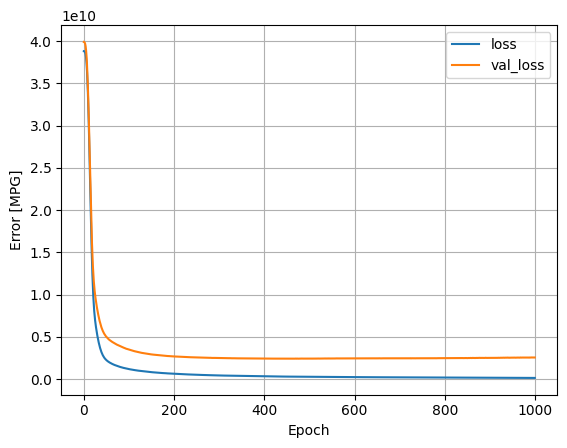

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
test_predictions = model.predict(test_x1).flatten()

pd.DataFrame(test_predictions)

46/46 [==============================] - 0s 2ms/step


,0
0,132564.234375
1,173987.140625
2,194323.359375
3,200001.125000
4,187429.125000
...,...
1454,69166.148438
1455,49663.492188
1456,195264.953125
1457,78453.835938


In [ ]:
final_df = pd.concat([test_x1['Id'].reset_index(), pd.DataFrame(test_predictions.T)], ignore_index = False, axis = 1)
final_df = final_df.iloc[:,1:3]
final_df.columns = ["Id", "SalePrice"]
final_df.isna().any()

Id           False
SalePrice    False
dtype: bool

In [ ]:
final_df.to_csv('neural_net_predictions.csv')

### Linear regression

In [ ]:
from sklearn.pipeline import Pipeline
# pipeline https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_x = combined_train_test_x_data[combined_train_test_x_data['dataset'] == 'train']
test_x = combined_train_test_x_data[combined_train_test_x_data['dataset'] == 'test']

object_columns = train_x.select_dtypes(include=['object']).columns
train_x[object_columns] = train_x[object_columns].astype('category')
object_columns = test_x.select_dtypes(include=['object']).columns
test_x[object_columns] = test_x[object_columns].astype('category')

categorical_columns = train_x.select_dtypes(include=['category']).columns # define categorical columns
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore') # define preprocessor for categorical columns
preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_preprocessor, categorical_columns),],
    remainder='passthrough'
) # transform numerical and categorical features at one time by ColumnTransformer

linear_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression()) # chain multiple processing steps together into a single object
]) # initialize and train the linear regression model
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.3, random_state=42)
linear_reg_model.fit(X_train, y_train) # train linear model
predictions = linear_reg_model.predict(X_val) # predict on validation set
rmse = np.sqrt(mean_squared_error(y_val, predictions)) # calculate RMSE
print("Root Mean Squared Error (RMSE):", rmse) # print RMSE

test_predictions = linear_reg_model.predict(test_x)
submission_df = pd.DataFrame({'Id': test_x['Id'], 'SalePrice': test_predictions}) # create a DataFrame with 'Id' and 'SalePrice' columns
print(submission_df.head())

submission_df.to_csv('linear_house_price_predictions.csv', index=False)
files.download('linear_house_price_predictions.csv')
print("Predictions saved to house_price_predictions.csv")

# one-hot encoding https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# ColumnTransformer https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
# pipeline https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156
# colab download https://stackoverflow.com/questions/48774285/how-to-download-file-created-in-colaboratory-workspace

<ipython-input-69-c6d0a437505d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[object_columns] = train_x[object_columns].astype('category')
<ipython-input-69-c6d0a437505d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x[object_columns] = test_x[object_columns].astype('category')


Root Mean Squared Error (RMSE): 31418.614400195354
     Id      SalePrice
0  1461  108046.532358
1  1462   98497.426760
2  1463  168781.554851
3  1464  187895.826018
4  1465  213189.381850


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predictions saved to house_price_predictions.csv
